In [0]:
# https://www.datacamp.com/courses/importing-data-in-python-part-2

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlretrieve
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup
import requests
import tweepy
import json
import re

## 1. Importing data from the Internet

#### Importing flat files from the web

In [0]:
# Import package
from urllib.request import urlretrieve

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

In [4]:
# Save file locally
urlretrieve(url, 'winequality-red.csv')

('winequality-red.csv', <http.client.HTTPMessage at 0x7fd1d3ae0b00>)

In [5]:
# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [0]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

In [0]:
# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

In [9]:
# Print the head of the DataFrame
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


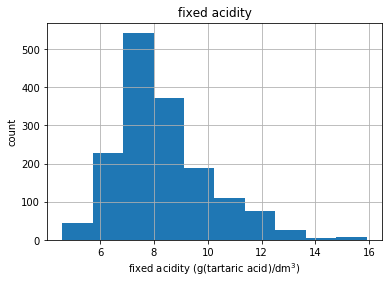

In [10]:
# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

**Importing non-flat files from the web**

 In this interactive exercise, you'll use pd.read_excel() to import an Excel spreadsheet.
 
 Your job is to use pd.read_excel() to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.
 
 Note that the output of pd.read_excel() is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [0]:
# Import package
import pandas as pd

In [0]:
# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

In [13]:
# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheetname=None)

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [14]:
# Print the sheetnames to the shell
print(xl.keys())

odict_keys(['1700', '1900'])


In [15]:
# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())

                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


#### HTTP requests to import files from the web

In [0]:
# Import packages
from urllib.request import urlopen, Request

In [0]:
# Specify the url
url = "http://www.datacamp.com/teach/documentation"

In [0]:
# This packages the request: request
request = Request(url)

In [0]:
# Sends the request and catches the response: response
response = urlopen(request)

In [20]:
# Print the datatype of response
print(type(response))

<class 'http.client.HTTPResponse'>


In [0]:
# Be polite and close the response!
response.close()

**Printing HTTP request results in Python using urllib**

In [0]:
# Import packages
from urllib.request import urlopen, Request

In [0]:
# Specify the url
url = "http://www.datacamp.com/teach/documentation"

In [0]:
# This packages the request
request = Request(url)

In [0]:
# Sends the request and catches the response: response
response = urlopen(request)

In [0]:
# Extract the response: html
html = response.read()

In [27]:
# Print the html
print(html)

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="CtAW38GekvUGExIXXGRGxD4JcKK9kDjE6OUJiiY9RjE="></script>\n      <script nonce="CtAW38GekvUGExIXXGRGxD4JcKK9kDjE6OUJiiY9RjE=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;edu

In [0]:
# Be polite and close the response!
response.close()

**Performing HTTP requests in Python using requests**

In [0]:
# Import package
import requests

In [0]:
# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

In [0]:
# Packages the request, send the request and catch the response: r
r = requests.get(url)

In [0]:
# Extract the response: text
text = r.text

In [34]:
# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="xs6yBBXPvNtlrtrC/iLebMkblhNvJG1XO1+pfpekUJ8="></script>
      <script nonce="xs6yBBXPvNtlrtrC/iLebMkblhNvJG1XO1+pfpekUJ8=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;educate_home&quot;,&quot;pl

**Parsing HTML with BeautifulSoup**

In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. 

#### Scraping the web in Python

In [0]:
# Import packages
import requests
from bs4 import BeautifulSoup

In [0]:
# Specify url: url
url = 'https://www.python.org/~guido/'

In [0]:
# Package the request, send the request and catch the response: r
r = requests.get(url)

In [0]:
# Extracts the response as html: html_doc
html_doc = r.text

In [0]:
# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

In [0]:
# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

In [41]:
# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a hr

In [0]:
# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)



*   Extract the title from the HTML soup soup using the attribute title and assign the result to guido_title.



In [0]:
# Get the title of Guido's webpage: guido_title
guido_title = soup.title

In [44]:
# Print the title of Guido's webpage to the shell
print(guido_title)

<title>Guido's Personal Home Page</title>




*   Extract the text from the HTML soup soup using the method get_text() and assign to guido_text.



In [0]:
# Get Guido's text: guido_text
guido_text = soup.get_text()

In [46]:
# Print Guido's text to the shell
print(guido_text)



Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) python.org,
comp.lang.python or
StackOverflow. 

**Turning a webpage into data using BeautifulSoup: getting the hyperlinks**

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage.


In [0]:
# Import packages
import requests
from bs4 import BeautifulSoup

In [0]:
# Specify url
url = 'https://www.python.org/~guido/'

In [0]:
# Package the request, send the request and catch the response: r
r = requests.get(url)

In [0]:
# Extracts the response as html: html_doc
html_doc = r.text

In [0]:
# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

In [52]:
# Print the title of Guido's webpage
print(soup.title)

<title>Guido's Personal Home Page</title>




*   Use the method find_all() to find all hyperlinks in soup



In [0]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')



*   The variable a_tags is a results set: your job now is to enumerate over it, using a for loop and to print the actual URLs of the hyperlinks; to do this, for every element link in a_tags, you want to print() link.get('href').



In [54]:
# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## 2. Interacting with APIs to import data from the web

#### Introduction to APIs and JSONs

What exactly is a JSON?



*   JSONs consist of key-value pairs.

*   JSONs are human-readable.
*   The JSON file format arose out of a growing need for real-time server-to-browser communication.
press



*   The function json.load() will load the JSON into Python as a dictionary.




In [0]:
# data not available
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

In [0]:
# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

#### APIs and interacting with the world wide web

What is an API?



*   An API is a set of protocols and routines for building and interacting with software applications.

*   API is an acronym and is short for Application Program interface.
*   It is common to pull data from APIs in the JSON file format.


*   An API is a bunch of code that allows two software programs to communicate with each other.





**API requests**

Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was 'http://www.omdbapi.com/?t=hackers' and had a single argument t=hackers.

Note: recently, OMDB has changed their API: you now also have to specify an API key. 



*   Assign to the variable url the URL of interest in order to query 'http://www.omdbapi.com' for the data corresponding to the movie The Social Network. The query string should have two arguments: apikey=72bc447a and t=the+social+network. You can combine them as follows: apikey=72bc447a&t=the+social+network.







In [0]:
# Import requests package
import requests

In [0]:
# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

In [0]:
# Package the request, send the request and catch the response: r
r = requests.get(url)

In [58]:
# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"567,207","imdbID":"tt

**JSON–from the web to Python**



*   Pass the variable url to the requests.get() function in order to send the relevant request and catch the response, assigning the resultant response message to the variable r.
*   Apply the json() method to the response object r and store the resulting dictionary in the variable json_data.



In [0]:
# Package the request, send the request and catch the response: r
r = requests.get(url)

In [0]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

In [61]:
# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  567,207
imdbID:  tt1285016
Type:  movie
DVD:

**Checking out the Wikipedian API**

What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

In [0]:
# Import package
import requests

In [0]:
# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

In [0]:
# Package the request, send the request and catch the response: r
r = requests.get(url)

In [0]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

In [66]:
# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. In formal settings, like a restaurant, pizza is eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since 

## 3. Diving deep into the Twitter API

#### The Twitter API and Authentication

**API Authentication**

The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

In [0]:
# Import package
import tweepy

In [0]:
# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

In [0]:
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

**Streaming tweets**

In [0]:
class MyStreamListener(tweepy.StreamListener):
  def __init__(self, api=None):
    super(MyStreamListener, self).__init__()
    self.num_tweets = 0
    self.file = open("tweets.txt", "w")
  def on_status(self, status):
    tweet = status._json
    self.file.write(json.dumps(tweet) + '\n')
    tweet_list.append(status)
    self.num_tweets += 1
    if self.num_tweets < 100:
      return True
    else:
      return False
    self.file.close()

In [0]:
# Initialize Stream listener
l = MyStreamListener()

In [0]:
# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

In [0]:
# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

**Load and explore your Twitter data**


In this exercise, you'll read the Twitter data into a list: tweets_data.

In [0]:
# Import package
import json

In [0]:
# String of path to file: tweets_data_path
tweets_data_path = '/content/tweets.txt'

In [0]:
# Initialize empty list to store tweets: tweets_data
tweets_data = []

In [0]:
# Open connection to file
tweets_file = open(tweets_data_path, "r")

In [0]:
# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

In [83]:
type(tweets_data)

list

In [0]:
# Close connection to file
tweets_file.close()

In [84]:
# Print the keys of the first tweet dict
print(tweets_data[0].keys())

IndexError: ignored

**Twitter data to DataFrame**

Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [0]:
# Import package
import pandas as pd

In [0]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

In [87]:
# Print head of DataFrame
print(df.head())

Empty DataFrame
Columns: [text, lang]
Index: []


**A little bit of Twitter text analysis**

Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. 

In [0]:
import re

In [0]:
def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [0]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

In [0]:
# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

**Plotting your Twitter data**

You'll then construct a barplot of the data using sns.barplot, passing it two arguments:






1.   a list of labels and
2.   a list containing the variables you wish to plot (clinton, trump and so on.)



In [0]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Set seaborn style
sns.set(color_codes=True)

In [0]:
# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

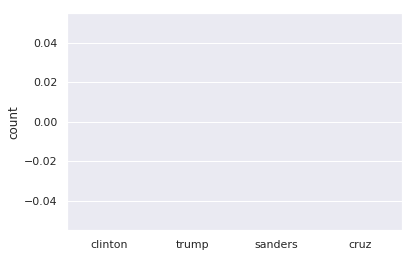

In [95]:
# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()